       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   
65531        54867               445                0                     0   

      Action    Bytes  Bytes Sent  Bytes Received  

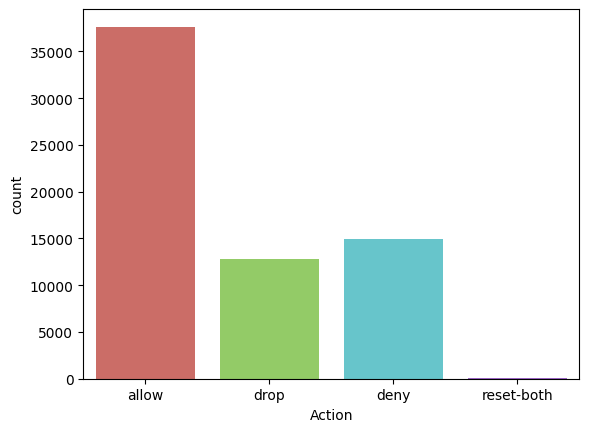

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0     0.000045      4.175336e-08         0.000043          4.175336e-08   
1     0.000044      2.669851e-06         0.000044          2.669851e-06   
2     0.000005      3.964284e-05         0.000034          3.964284e-05   
3     0.000040      2.669851e-06         0.000040          2.669851e-06   
4     0.000039      3.489950e-07         0.000036          3.489950e-07   

          Bytes    Bytes Sent  Bytes Received       Packets  \
0  1.394405e-07  7.405312e-08    6.538733e-08  1.575598e-09   
1  3.756227e-06  1.260479e-06    2.495748e-06  1.496818e-08   
2  1.874962e-07  9.296030e-08    9.453590e-08  1.575598e-09   
3  2.621008e-06  1.132855e-06    1.488153e-06  1.181699e-08   
4  1.997701e-05  5.339703e-06    1.463731e-05  2.442177e-08   

   Elapsed Time (sec)     pkts_sent  pkts_received  
0        2.363398e-08  7.877992e-10   7.877992e-10  
1        1.339259e-08  7.877992e-09   7.090193e-09  
2        9.

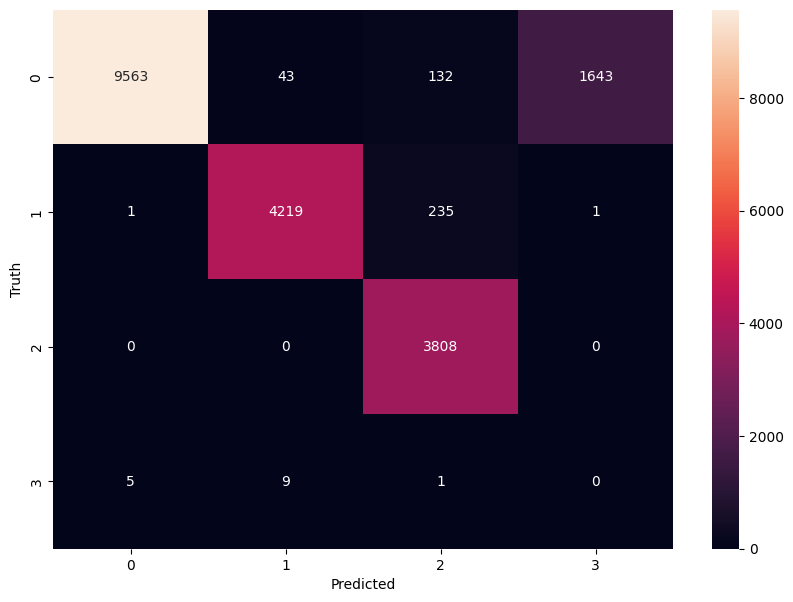

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('firewall.csv')

# Display the dataframe
print(df, "\n")

# Display dataframe info
df.info(); print()

# Define the target variable and features
y = df['Action'].values
y = y.reshape(-1,1)
x_data = df.drop(['Action'],axis = 1)

# Display the features
print(x_data, "\n")

# Plot the count of 'Action'
sns.countplot(x='Action', hue='Action', data=df, palette='hls', legend=False)
plt.show()

# Normalize the data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

# Display the normalized data
print(x.head(), "\n")

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state= 300)

# Print the shapes of the training and test sets
print("Shapes of the training and test sets:")
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape, "\n")

# Create an AdaBoost Classifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train the model using the training sets
model = abc.fit(x_train, y_train.ravel())

# Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred), "\n")

# Classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix as text
print("\nConfusion Matrix:")
print(cnf_matrix)

# Create a heatmap using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()